In [1]:
import pandas as pd
from PIL import Image
from scipy.integrate import odeint
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# import mlflow
# import mlflow.pytorch
import pandas as pd

## ODE

In [2]:
# ODE function for a simple pendulum exact solution
def simple_pendulum_eqn(state, t, L, g):
    theta, theta_dot = state
    theta_ddot = -k*np.sin(theta)
    return [theta_dot, theta_ddot]

# L=0.19

## L=0.19, Theta=PI/4, 5 sec

In [3]:
df = pd.read_csv('data/raw_data/l19_pi4_5s.csv')

In [4]:
df2=df
df2['t'] = df2['t'].shift(3)

df2 = df2[3:153]

In [5]:
df2

,t,x,y,theta
3,0.0000,0.163,0.1630,0.786
4,0.0334,0.168,0.1590,0.758
5,0.0667,0.181,0.1430,0.670
6,0.1000,0.198,0.1220,0.552
7,0.1330,0.214,0.0924,0.408
...,...,...,...,...
148,4.8380,0.202,-0.0632,-0.302
149,4.8720,0.192,-0.0840,-0.413
150,4.9050,0.183,-0.1010,-0.505
151,4.9380,0.176,-0.1100,-0.558


In [6]:
# Parameters
L = 0.19  # Length of pendulum
g = 9.81  # Acceleration due to gravity
w = np.sqrt(g/L)
k = w**2
# start_angle = np.pi/4
start_angle = 0.786
end_time = 5


# Initial state [theta, theta_dot]
initial_state = [start_angle, 0]

# Create a one-dimensional time array
t = np.linspace(0, end_time, 500)
x = torch.tensor(t, dtype=torch.float32).view(-1, 1)

In [7]:
# Numerical solution of the simple pendulum ODEs
states = odeint(simple_pendulum_eqn, initial_state, t, args=(L, g))
y = torch.tensor(states[:, 0], dtype=torch.float32).view(-1, 1)

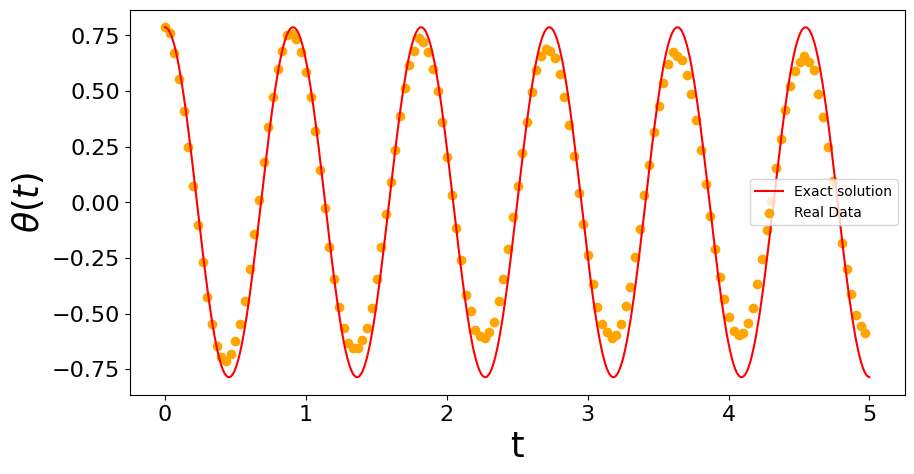

In [8]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Exact solution', color='red')
plt.scatter(df2['t'], df2['theta'], label='Real Data', color='orange')
plt.xlabel('t', fontsize=25)
plt.ylabel(r'$\theta(t)$', fontsize=25)
plt.tick_params(labelsize=16)
plt.legend()
plt.show()

In [9]:
df2 = df2[['t', 'theta']]

In [10]:
df2['length'] = L
df2['start_angle'] = start_angle
df2

/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_1765/3596997626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['length'] = L


,t,theta,length,start_angle
3,0.0000,0.786,0.19,0.786
4,0.0334,0.758,0.19,0.786
5,0.0667,0.670,0.19,0.786
6,0.1000,0.552,0.19,0.786
7,0.1330,0.408,0.19,0.786
...,...,...,...,...
148,4.8380,-0.302,0.19,0.786
149,4.8720,-0.413,0.19,0.786
150,4.9050,-0.505,0.19,0.786
151,4.9380,-0.558,0.19,0.786


In [11]:
df2.to_csv('data/curated_data/l19_pi4_5s.csv', index=False)

In [12]:
df_l19_pi4 = df2

## L=0.19, Theta=PI/16, 5 sec

In [13]:
df = pd.read_csv('data/raw_data/l19_5s_pi16.csv')

In [14]:
df2=df
# df2['t'] = df2['t'].shift(2)

# df2 = df2[2:153]

In [15]:
df2

,t,x,y,theta
0,0.00000,0.209,0.05863,0.274
1,0.03337,0.210,0.05535,0.257
2,0.06673,0.214,0.04878,0.225
3,0.10000,0.218,0.03894,0.177
4,0.13300,0.221,0.02829,0.127
...,...,...,...,...
168,5.60600,0.215,-0.03612,-0.166
169,5.63900,0.214,-0.04671,-0.215
170,5.67200,0.212,-0.05076,-0.235
171,5.70600,0.211,-0.05320,-0.247


In [16]:
# Parameters
L = 0.19  # Length of pendulum
g = 9.81  # Acceleration due to gravity
w = np.sqrt(g/L)
k = w**2
start_angle = 0.274
# start_angle = np.pi/16
end_time = 5


# Initial state [theta, theta_dot]
initial_state = [start_angle, 0]

# Create a one-dimensional time array
t = np.linspace(0, end_time, 500)
x = torch.tensor(t, dtype=torch.float32).view(-1, 1)

In [17]:
# Numerical solution of the simple pendulum ODEs
states = odeint(simple_pendulum_eqn, initial_state, t, args=(L, g))
y = torch.tensor(states[:, 0], dtype=torch.float32).view(-1, 1)

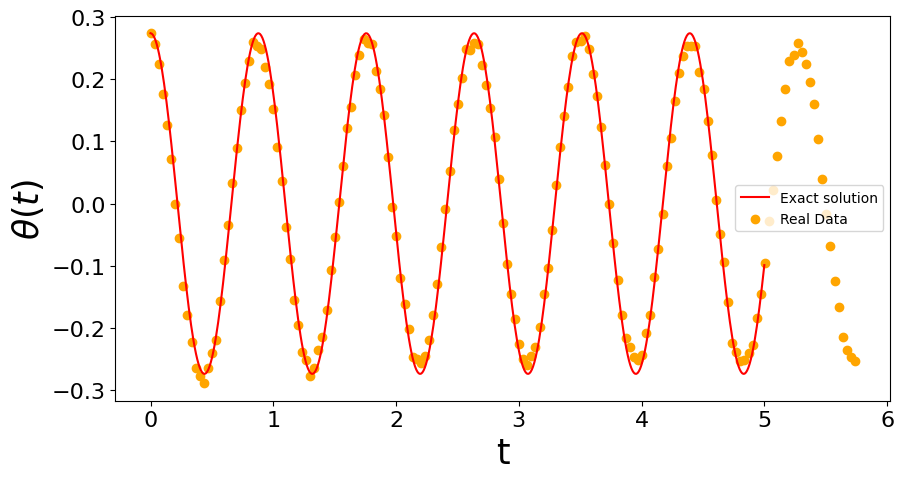

In [18]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Exact solution', color='red')
plt.scatter(df2['t'], df2['theta'], label='Real Data', color='orange')
plt.xlabel('t', fontsize=25)
plt.ylabel(r'$\theta(t)$', fontsize=25)
plt.tick_params(labelsize=16)
plt.legend()
plt.show()

In [19]:
df2 = df2[['t', 'theta']]

In [20]:
df2['length'] = L
df2['start_angle'] = start_angle
df2

/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_1765/3596997626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['length'] = L


,t,theta,length,start_angle
0,0.00000,0.274,0.19,0.274
1,0.03337,0.257,0.19,0.274
2,0.06673,0.225,0.19,0.274
3,0.10000,0.177,0.19,0.274
4,0.13300,0.127,0.19,0.274
...,...,...,...,...
168,5.60600,-0.166,0.19,0.274
169,5.63900,-0.215,0.19,0.274
170,5.67200,-0.235,0.19,0.274
171,5.70600,-0.247,0.19,0.274


In [21]:
df2.to_csv('data/curated_data/l19_pi16_5s.csv', index=False)

In [22]:
df_l19_pi16 = df2

In [23]:
# df_merged = pd.concat([df_pi4, df_pi16])

In [24]:
# df_merged

In [25]:
# df_merged.to_csv('real_data_5sec.csv', index=False)

## L=0.19, Theta=PI/2, 5 sec

In [26]:
df = pd.read_csv('data/raw_data/l19_pi2_5s.csv')

In [27]:
df2=df
# df2['t'] = df2['t'].shift(2)

# df2 = df2[2:153]

In [28]:
df2

,t,x,y,theta
0,0.00000,-0.005253,0.208,1.596
1,0.03337,0.008804,0.209,1.529
2,0.06673,0.028670,0.211,1.436
3,0.10000,0.064180,0.210,1.274
4,0.13300,0.110000,0.195,1.056
...,...,...,...,...
147,4.90500,0.123000,0.182,0.975
148,4.93800,0.097910,0.199,1.114
149,4.97200,0.076520,0.205,1.214
150,5.00500,0.071620,0.210,1.242


In [29]:
# Parameters
L = 0.19  # Length of pendulum
g = 9.81  # Acceleration due to gravity
w = np.sqrt(g/L)
k = w**2
start_angle = 1.596
# start_angle = np.pi/2
end_time = 5


# Initial state [theta, theta_dot]
initial_state = [start_angle, 0]

# Create a one-dimensional time array
t = np.linspace(0, end_time, 500)
x = torch.tensor(t, dtype=torch.float32).view(-1, 1)

In [30]:
# Numerical solution of the simple pendulum ODEs
states = odeint(simple_pendulum_eqn, initial_state, t, args=(L, g))
y = torch.tensor(states[:, 0], dtype=torch.float32).view(-1, 1)

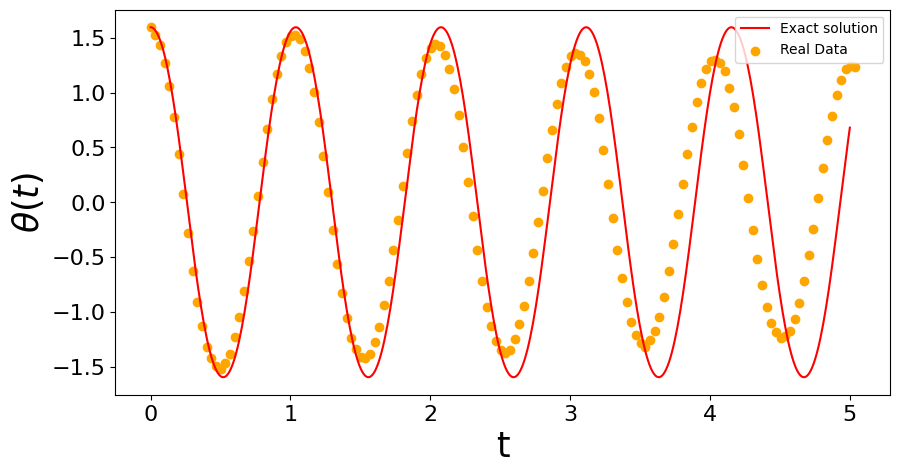

In [31]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Exact solution', color='red')
plt.scatter(df2['t'], df2['theta'], label='Real Data', color='orange')
plt.xlabel('t', fontsize=25)
plt.ylabel(r'$\theta(t)$', fontsize=25)
plt.tick_params(labelsize=16)
plt.legend()
plt.show()

In [32]:
df2 = df2[['t', 'theta']]

In [33]:
df2['length'] = L
df2['start_angle'] = start_angle
df2

/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_1765/3596997626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['length'] = L


,t,theta,length,start_angle
0,0.00000,1.596,0.19,1.596
1,0.03337,1.529,0.19,1.596
2,0.06673,1.436,0.19,1.596
3,0.10000,1.274,0.19,1.596
4,0.13300,1.056,0.19,1.596
...,...,...,...,...
147,4.90500,0.975,0.19,1.596
148,4.93800,1.114,0.19,1.596
149,4.97200,1.214,0.19,1.596
150,5.00500,1.242,0.19,1.596


In [34]:
df2.to_csv('data/curated_data/l19_pi2_5s.csv', index=False)

In [35]:
df_l19_pi2= df2

## L=0.19, Theta=PI/6, 5 sec

In [36]:
df = pd.read_csv('data/raw_data/l19_pi8_5s.csv')

In [37]:
df2=df
# df2['t'] = df2['t'].shift(2)

# df2 = df2[2:153]

In [38]:
df2

,t,x,y,theta
0,0.00000,0.193,0.10300,0.492
1,0.03337,0.193,0.09931,0.476
2,0.06673,0.198,0.09180,0.433
3,0.10000,0.204,0.07935,0.371
4,0.13300,0.210,0.05702,0.265
...,...,...,...,...
147,4.90500,0.211,-0.09199,-0.410
148,4.93800,0.212,-0.08869,-0.397
149,4.97200,0.213,-0.08214,-0.368
150,5.00500,0.220,-0.06745,-0.297


In [39]:
# Parameters
L = 0.19  # Length of pendulum
g = 9.81  # Acceleration due to gravity
w = np.sqrt(g/L)
k = w**2
start_angle = 0.49200
# start_angle = np.pi/2
end_time = 5


# Initial state [theta, theta_dot]
initial_state = [start_angle, 0]

# Create a one-dimensional time array
t = np.linspace(0, end_time, 500)
x = torch.tensor(t, dtype=torch.float32).view(-1, 1)

In [40]:
# Numerical solution of the simple pendulum ODEs
states = odeint(simple_pendulum_eqn, initial_state, t, args=(L, g))
y = torch.tensor(states[:, 0], dtype=torch.float32).view(-1, 1)

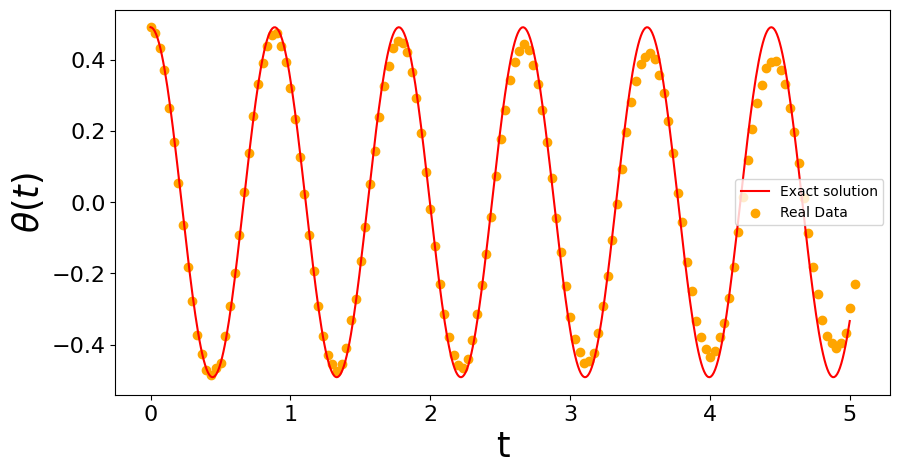

In [41]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Exact solution', color='red')
plt.scatter(df2['t'], df2['theta'], label='Real Data', color='orange')
plt.xlabel('t', fontsize=25)
plt.ylabel(r'$\theta(t)$', fontsize=25)
plt.tick_params(labelsize=16)
plt.legend()
plt.show()

In [42]:
df2 = df2[['t', 'theta']]

In [43]:
df2['length'] = L
df2['start_angle'] = start_angle
df2

/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_1765/3596997626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['length'] = L


,t,theta,length,start_angle
0,0.00000,0.492,0.19,0.492
1,0.03337,0.476,0.19,0.492
2,0.06673,0.433,0.19,0.492
3,0.10000,0.371,0.19,0.492
4,0.13300,0.265,0.19,0.492
...,...,...,...,...
147,4.90500,-0.410,0.19,0.492
148,4.93800,-0.397,0.19,0.492
149,4.97200,-0.368,0.19,0.492
150,5.00500,-0.297,0.19,0.492


In [44]:
df2.to_csv('data/curated_data/l19_pi8_5s.csv', index=False)

In [45]:
df_l19_pi8= df2

# L=0.09


## L=0.09, Theta=PI/10, 5 sec

In [46]:
df = pd.read_csv('data/raw_data/l09_pi16_5s.csv')

In [47]:
df2=df
# df2['t'] = df2['t'].shift(2)

# df2 = df2[2:153]

In [48]:
df2

,t,x,y,theta,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0.00000,0.190,0.061590,0.314000,NaN,NaN,NaN
1,0.03337,0.197,0.055080,0.272000,NaN,NaN,NaN
2,0.06673,0.197,0.047180,0.235000,NaN,NaN,NaN
3,0.10000,0.198,0.034520,0.172000,NaN,NaN,NaN
4,0.13300,0.206,0.010640,0.051690,NaN,NaN,NaN
...,...,...,...,...,...,...,...
138,4.60500,0.194,-0.000136,-0.000699,NaN,NaN,NaN
139,4.63800,0.191,-0.023740,-0.124000,NaN,NaN,NaN
140,4.67100,0.192,-0.042720,-0.219000,NaN,NaN,NaN
141,4.70500,0.188,-0.052110,-0.270000,NaN,NaN,NaN


In [49]:
# Parameters
L = 0.09  # Length of pendulum
g = 9.81  # Acceleration due to gravity
w = np.sqrt(g/L)
k = w**2
start_angle = 0.314000
# start_angle = np.pi/16
end_time = 5


# Initial state [theta, theta_dot]
initial_state = [start_angle, 0]

# Create a one-dimensional time array
t = np.linspace(0, end_time, 500)
x = torch.tensor(t, dtype=torch.float32).view(-1, 1)

In [50]:
# Numerical solution of the simple pendulum ODEs
states = odeint(simple_pendulum_eqn, initial_state, t, args=(L, g))
y = torch.tensor(states[:, 0], dtype=torch.float32).view(-1, 1)

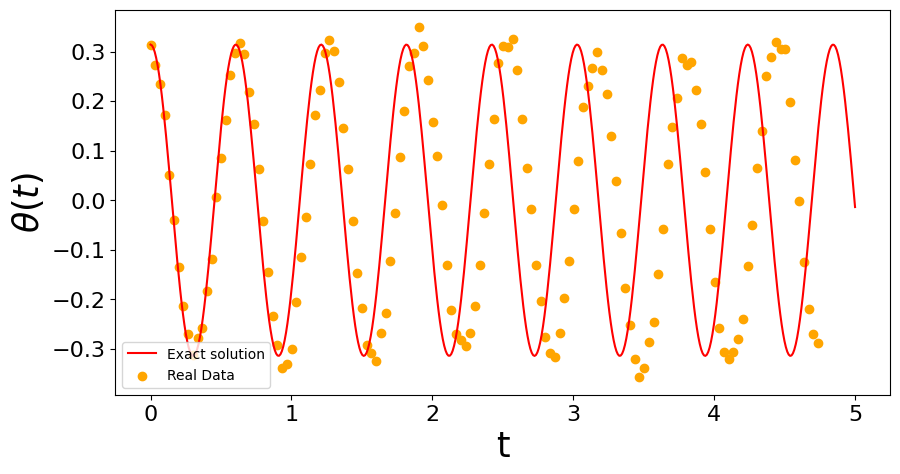

In [51]:
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Exact solution', color='red')
plt.scatter(df2['t'], df2['theta'], label='Real Data', color='orange')
plt.xlabel('t', fontsize=25)
plt.ylabel(r'$\theta(t)$', fontsize=25)
plt.tick_params(labelsize=16)
plt.legend()
plt.show()

In [52]:
df2 = df2[['t', 'theta']]

In [53]:
df2['length'] = L
df2['start_angle'] = start_angle
df2

/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_1765/3596997626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['length'] = L
/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_1765/3596997626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['start_angle'] = start_angle


,t,theta,length,start_angle
0,0.00000,0.314000,0.09,0.314
1,0.03337,0.272000,0.09,0.314
2,0.06673,0.235000,0.09,0.314
3,0.10000,0.172000,0.09,0.314
4,0.13300,0.051690,0.09,0.314
...,...,...,...,...
138,4.60500,-0.000699,0.09,0.314
139,4.63800,-0.124000,0.09,0.314
140,4.67100,-0.219000,0.09,0.314
141,4.70500,-0.270000,0.09,0.314


In [54]:
df2.to_csv('data/curated_data/l09_pi10_5s.csv', index=False)

In [55]:
df_l9_pi10 = df2

## L=0.09, Theta=PI/2, 5 sec

In [56]:
df = pd.read_csv('data/raw_data/l09_pi2_5s.csv')

In [57]:
df2=df
# df2['t'] = df2['t'].shift(2)

# df2 = df2[2:153]

In [58]:
df2

,t,x,y,theta,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0.00000,-0.002520,0.10900,1.594,NaN,NaN,NaN
1,0.03337,0.003335,0.10800,1.540,NaN,NaN,NaN
2,0.06673,0.023060,0.10400,1.353,NaN,NaN,NaN
3,0.10000,0.051400,0.09238,1.063,NaN,NaN,NaN
4,0.13300,0.082310,0.06727,0.685,NaN,NaN,NaN
...,...,...,...,...,...,...,...
149,4.97200,0.037750,0.09723,1.200,NaN,NaN,NaN
150,5.00500,0.046430,0.09333,1.109,NaN,NaN,NaN
151,5.03800,0.062270,0.08411,0.934,NaN,NaN,NaN
152,5.07200,0.082840,0.06086,0.634,NaN,NaN,NaN


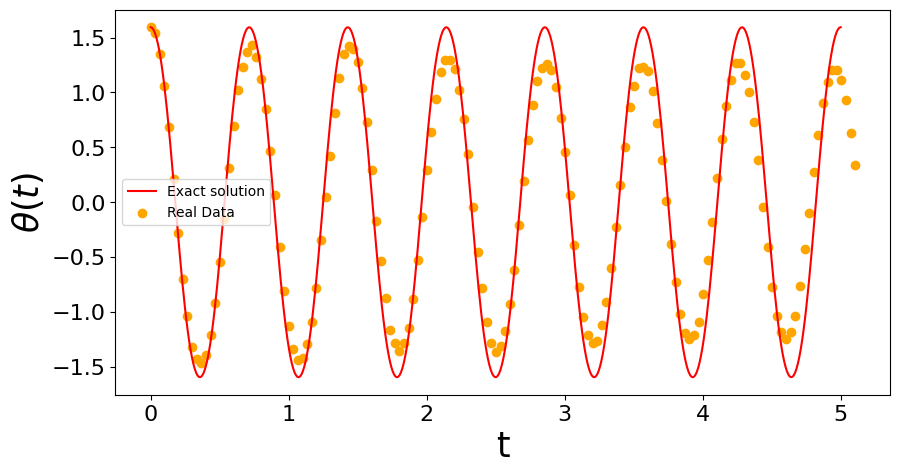

In [59]:
# Parameters
L = 0.09  # Length of pendulum
g = 9.81  # Acceleration due to gravity
w = np.sqrt(g/L)
k = w**2
start_angle = 1.594
# start_angle = np.pi/2
end_time = 5


# Initial state [theta, theta_dot]
initial_state = [start_angle, 0]

# Create a one-dimensional time array
t = np.linspace(0, end_time, 500)
x = torch.tensor(t, dtype=torch.float32).view(-1, 1)

# Numerical solution of the simple pendulum ODEs
states = odeint(simple_pendulum_eqn, initial_state, t, args=(L, g))
y = torch.tensor(states[:, 0], dtype=torch.float32).view(-1, 1)

fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Exact solution', color='red')
plt.scatter(df2['t'], df2['theta'], label='Real Data', color='orange')
plt.xlabel('t', fontsize=25)
plt.ylabel(r'$\theta(t)$', fontsize=25)
plt.tick_params(labelsize=16)
plt.legend()
plt.show()

In [60]:
df2 = df2[['t', 'theta']]
df2['length'] = L
df2['start_angle'] = start_angle
df2

/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_1765/4106266282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['length'] = L
/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_1765/4106266282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['start_angle'] = start_angle


,t,theta,length,start_angle
0,0.00000,1.594,0.09,1.594
1,0.03337,1.540,0.09,1.594
2,0.06673,1.353,0.09,1.594
3,0.10000,1.063,0.09,1.594
4,0.13300,0.685,0.09,1.594
...,...,...,...,...
149,4.97200,1.200,0.09,1.594
150,5.00500,1.109,0.09,1.594
151,5.03800,0.934,0.09,1.594
152,5.07200,0.634,0.09,1.594


In [61]:
df2.to_csv('data/curated_data/l09_pi2_5s.csv', index=False)
df_l9_pi2 = df2

## L=0.09, Theta=PI/4, 5 sec

In [62]:
df = pd.read_csv('data/raw_data/l09_pi4_5s.csv')

In [63]:
df2=df
# df2['t'] = df2['t'].shift(2)

# df2 = df2[2:153]

In [64]:
df2

,t,x,y,theta,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0.00000,0.06918,0.079350,0.85400,NaN,NaN,NaN
1,0.03337,0.07824,0.073230,0.75200,NaN,NaN,NaN
2,0.06673,0.08453,0.057950,0.60100,NaN,NaN,NaN
3,0.10000,0.09895,0.033210,0.32400,NaN,NaN,NaN
4,0.13300,0.10400,0.007888,0.07562,NaN,NaN,NaN
...,...,...,...,...,...,...,...
147,4.90500,0.07351,-0.066790,-0.73800,NaN,NaN,NaN
148,4.93800,0.07955,-0.061080,-0.65500,NaN,NaN,NaN
149,4.97200,0.08567,-0.052020,-0.54600,NaN,NaN,NaN
150,5.00500,0.09627,-0.033020,-0.33000,NaN,NaN,NaN


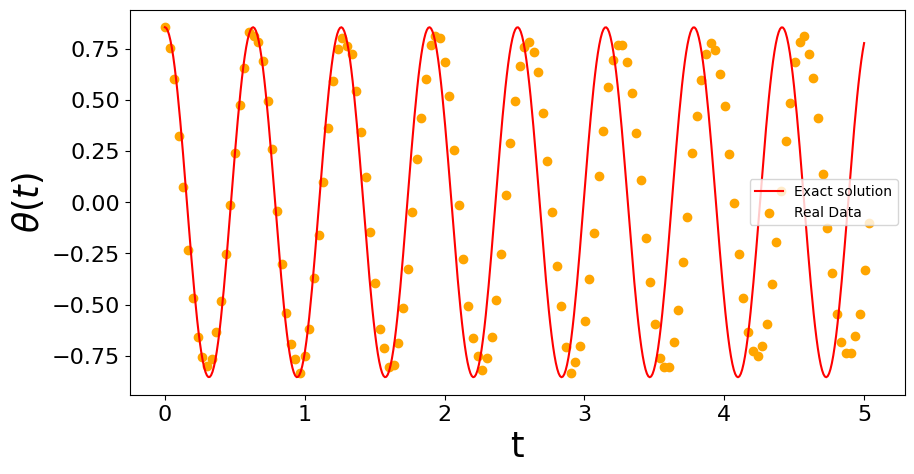

In [65]:
# Parameters
L = 0.09  # Length of pendulum
g = 9.81  # Acceleration due to gravity
w = np.sqrt(g/L)
k = w**2
start_angle = 0.85400
# start_angle = np.pi/2
end_time = 5


# Initial state [theta, theta_dot]
initial_state = [start_angle, 0]

# Create a one-dimensional time array
t = np.linspace(0, end_time, 500)
x = torch.tensor(t, dtype=torch.float32).view(-1, 1)

# Numerical solution of the simple pendulum ODEs
states = odeint(simple_pendulum_eqn, initial_state, t, args=(L, g))
y = torch.tensor(states[:, 0], dtype=torch.float32).view(-1, 1)

fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Exact solution', color='red')
plt.scatter(df2['t'], df2['theta'], label='Real Data', color='orange')
plt.xlabel('t', fontsize=25)
plt.ylabel(r'$\theta(t)$', fontsize=25)
plt.tick_params(labelsize=16)
plt.legend()
plt.show()

In [66]:
df2 = df2[['t', 'theta']]
df2['length'] = L
df2['start_angle'] = start_angle
df2

/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_1765/4106266282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['length'] = L
/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_1765/4106266282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['start_angle'] = start_angle


,t,theta,length,start_angle
0,0.00000,0.85400,0.09,0.854
1,0.03337,0.75200,0.09,0.854
2,0.06673,0.60100,0.09,0.854
3,0.10000,0.32400,0.09,0.854
4,0.13300,0.07562,0.09,0.854
...,...,...,...,...
147,4.90500,-0.73800,0.09,0.854
148,4.93800,-0.65500,0.09,0.854
149,4.97200,-0.54600,0.09,0.854
150,5.00500,-0.33000,0.09,0.854


In [67]:
df2.to_csv('data/curated_data/l09_pi4_5s.csv', index=False)
df_l9_pi4 = df2

## L=0.09, Theta=PI/8, 5 sec

In [76]:
df = pd.read_csv('data/raw_data/l09_pi8_5s.csv')

In [77]:
df2=df
# df2['t'] = df2['t'].shift(2)

# df2 = df2[2:153]

In [78]:
df2

,t,x,y,theta,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0.00000,0.09140,0.053580,0.53000,NaN,NaN,NaN
1,0.03337,0.09138,0.052840,0.52400,NaN,NaN,NaN
2,0.06673,0.09342,0.046120,0.45900,NaN,NaN,NaN
3,0.10000,0.09828,0.034150,0.33400,NaN,NaN,NaN
4,0.13300,0.10300,0.017000,0.16400,NaN,NaN,NaN
...,...,...,...,...,...,...,...
147,4.90500,0.09737,-0.027990,-0.28000,NaN,NaN,NaN
148,4.93800,0.10300,-0.015560,-0.15000,NaN,NaN,NaN
149,4.97200,0.10400,0.001432,0.01376,NaN,NaN,NaN
150,5.00500,0.10100,0.018540,0.18200,NaN,NaN,NaN


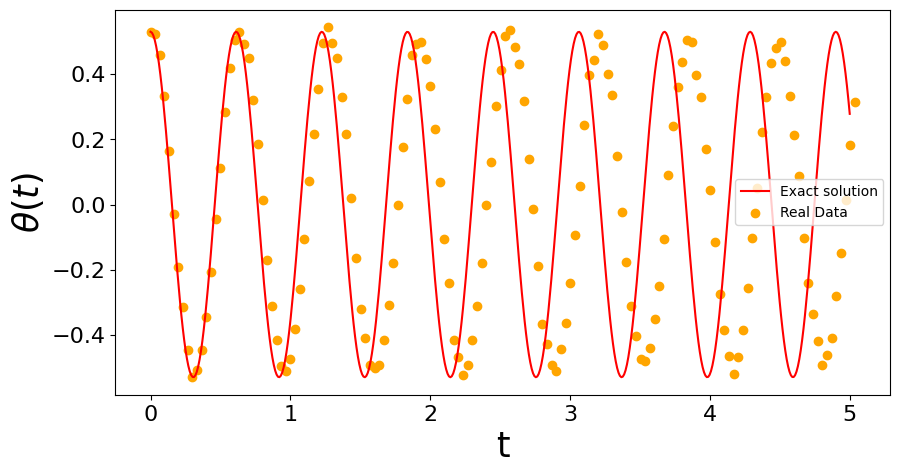

In [79]:
# Parameters
L = 0.09  # Length of pendulum
g = 9.81  # Acceleration due to gravity
w = np.sqrt(g/L)
k = w**2
start_angle = 0.53000
# start_angle = np.pi/2
end_time = 5


# Initial state [theta, theta_dot]
initial_state = [start_angle, 0]

# Create a one-dimensional time array
t = np.linspace(0, end_time, 500)
x = torch.tensor(t, dtype=torch.float32).view(-1, 1)

# Numerical solution of the simple pendulum ODEs
states = odeint(simple_pendulum_eqn, initial_state, t, args=(L, g))
y = torch.tensor(states[:, 0], dtype=torch.float32).view(-1, 1)

fig = plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Exact solution', color='red')
plt.scatter(df2['t'], df2['theta'], label='Real Data', color='orange')
plt.xlabel('t', fontsize=25)
plt.ylabel(r'$\theta(t)$', fontsize=25)
plt.tick_params(labelsize=16)
plt.legend()
plt.show()

In [80]:
df2 = df2[['t', 'theta']]
df2['length'] = L
df2['start_angle'] = start_angle
df2

/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_1765/4106266282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['length'] = L
/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_1765/4106266282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['start_angle'] = start_angle


,t,theta,length,start_angle
0,0.00000,0.53000,0.09,0.53
1,0.03337,0.52400,0.09,0.53
2,0.06673,0.45900,0.09,0.53
3,0.10000,0.33400,0.09,0.53
4,0.13300,0.16400,0.09,0.53
...,...,...,...,...
147,4.90500,-0.28000,0.09,0.53
148,4.93800,-0.15000,0.09,0.53
149,4.97200,0.01376,0.09,0.53
150,5.00500,0.18200,0.09,0.53


In [81]:
df2.to_csv('data/curated_data/l09_pi8_5s.csv', index=False)
df_l9_pi8 = df2

# MERGE ALL DATA

In [82]:
df_merged = pd.concat([df_l19_pi4, df_l19_pi16, df_l19_pi2, df_l19_pi8, 
                       df_l9_pi2, df_l9_pi10, df_l9_pi4, df_l9_pi8
                      ])

In [83]:
df_merged

,t,theta,length,start_angle
3,0.0000,0.78600,0.19,0.786
4,0.0334,0.75800,0.19,0.786
5,0.0667,0.67000,0.19,0.786
6,0.1000,0.55200,0.19,0.786
7,0.1330,0.40800,0.19,0.786
...,...,...,...,...
147,4.9050,-0.28000,0.09,0.530
148,4.9380,-0.15000,0.09,0.530
149,4.9720,0.01376,0.09,0.530
150,5.0050,0.18200,0.09,0.530


In [84]:
df_merged.to_csv('data/clean_data/real_pendulum_data_5sec.csv', index=False)